In [1]:
!pip install torchinfo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader
from torchinfo import summary
from tqdm.notebook import tqdm
from time import sleep

warnings.filterwarnings('ignore')

In [3]:
transform_vis = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((224,224)),
                                transforms.Normalize(mean=(0,0,0),std=(1,1,1))])

train_dataset_cifar10 = datasets.CIFAR10(root='/content/drive/MyDrive/MACHINE LEARNING MAY/DAY11_CNN_ARCHITECTURES/CIFAR10_DATA',
                                         train=True,
                                         download=True,
                                         transform=transform_vis)

test_dataset_cifar10 = datasets.CIFAR10(root='/content/drive/MyDrive/MACHINE LEARNING MAY/DAY11_CNN_ARCHITECTURES/CIFAR10_DATA',
                                         train=False,
                                         download=True,
                                         transform=transform_vis)

train_dataset_cifar100 = datasets.CIFAR100(root='/content/drive/MyDrive/MACHINE LEARNING MAY/DAY11_CNN_ARCHITECTURES/CIFAR100_DATA',
                                         train=True,
                                         download=True,
                                         transform=transform_vis)

test_dataset_cifar100 = datasets.CIFAR100(root='/content/drive/MyDrive/MACHINE LEARNING MAY/DAY11_CNN_ARCHITECTURES/CIFAR100_DATA',
                                         train=False,
                                         download=True,
                                         transform=transform_vis)

train_loader_cifar10 = DataLoader(train_dataset_cifar10, batch_size=64, shuffle=True, drop_last=True)
test_loader_cifar10 = DataLoader(test_dataset_cifar10, batch_size=64, shuffle=False, drop_last=True)
train_loader_cifar100 = DataLoader(train_dataset_cifar100, batch_size=64, shuffle=True, drop_last=True)
test_loader_cifar100 = DataLoader(test_dataset_cifar100, batch_size=64, shuffle=False, drop_last=True)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [4]:
for x,y in train_loader_cifar10:
  batch1_features_cifar10 = x
  batch1_labels_cifar10 = y
  print(batch1_features_cifar10)
  print(batch1_labels_cifar10)
  break

tensor([[[[0.7882, 0.7882, 0.7882,  ..., 0.4706, 0.4706, 0.4706],
          [0.7882, 0.7882, 0.7882,  ..., 0.4706, 0.4706, 0.4706],
          [0.7882, 0.7882, 0.7882,  ..., 0.4706, 0.4706, 0.4706],
          ...,
          [0.5765, 0.5765, 0.5765,  ..., 0.4392, 0.4392, 0.4392],
          [0.5765, 0.5765, 0.5765,  ..., 0.4392, 0.4392, 0.4392],
          [0.5765, 0.5765, 0.5765,  ..., 0.4392, 0.4392, 0.4392]],

         [[0.8000, 0.8000, 0.8000,  ..., 0.4471, 0.4471, 0.4471],
          [0.8000, 0.8000, 0.8000,  ..., 0.4471, 0.4471, 0.4471],
          [0.8000, 0.8000, 0.8000,  ..., 0.4471, 0.4471, 0.4471],
          ...,
          [0.5608, 0.5608, 0.5608,  ..., 0.5059, 0.5059, 0.5059],
          [0.5608, 0.5608, 0.5608,  ..., 0.5059, 0.5059, 0.5059],
          [0.5608, 0.5608, 0.5608,  ..., 0.5059, 0.5059, 0.5059]],

         [[0.8431, 0.8431, 0.8431,  ..., 0.4392, 0.4392, 0.4392],
          [0.8431, 0.8431, 0.8431,  ..., 0.4392, 0.4392, 0.4392],
          [0.8431, 0.8431, 0.8431,  ..., 0

In [5]:
batch1_features_cifar10.shape, batch1_labels_cifar10.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [6]:
classes_cifar10 = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

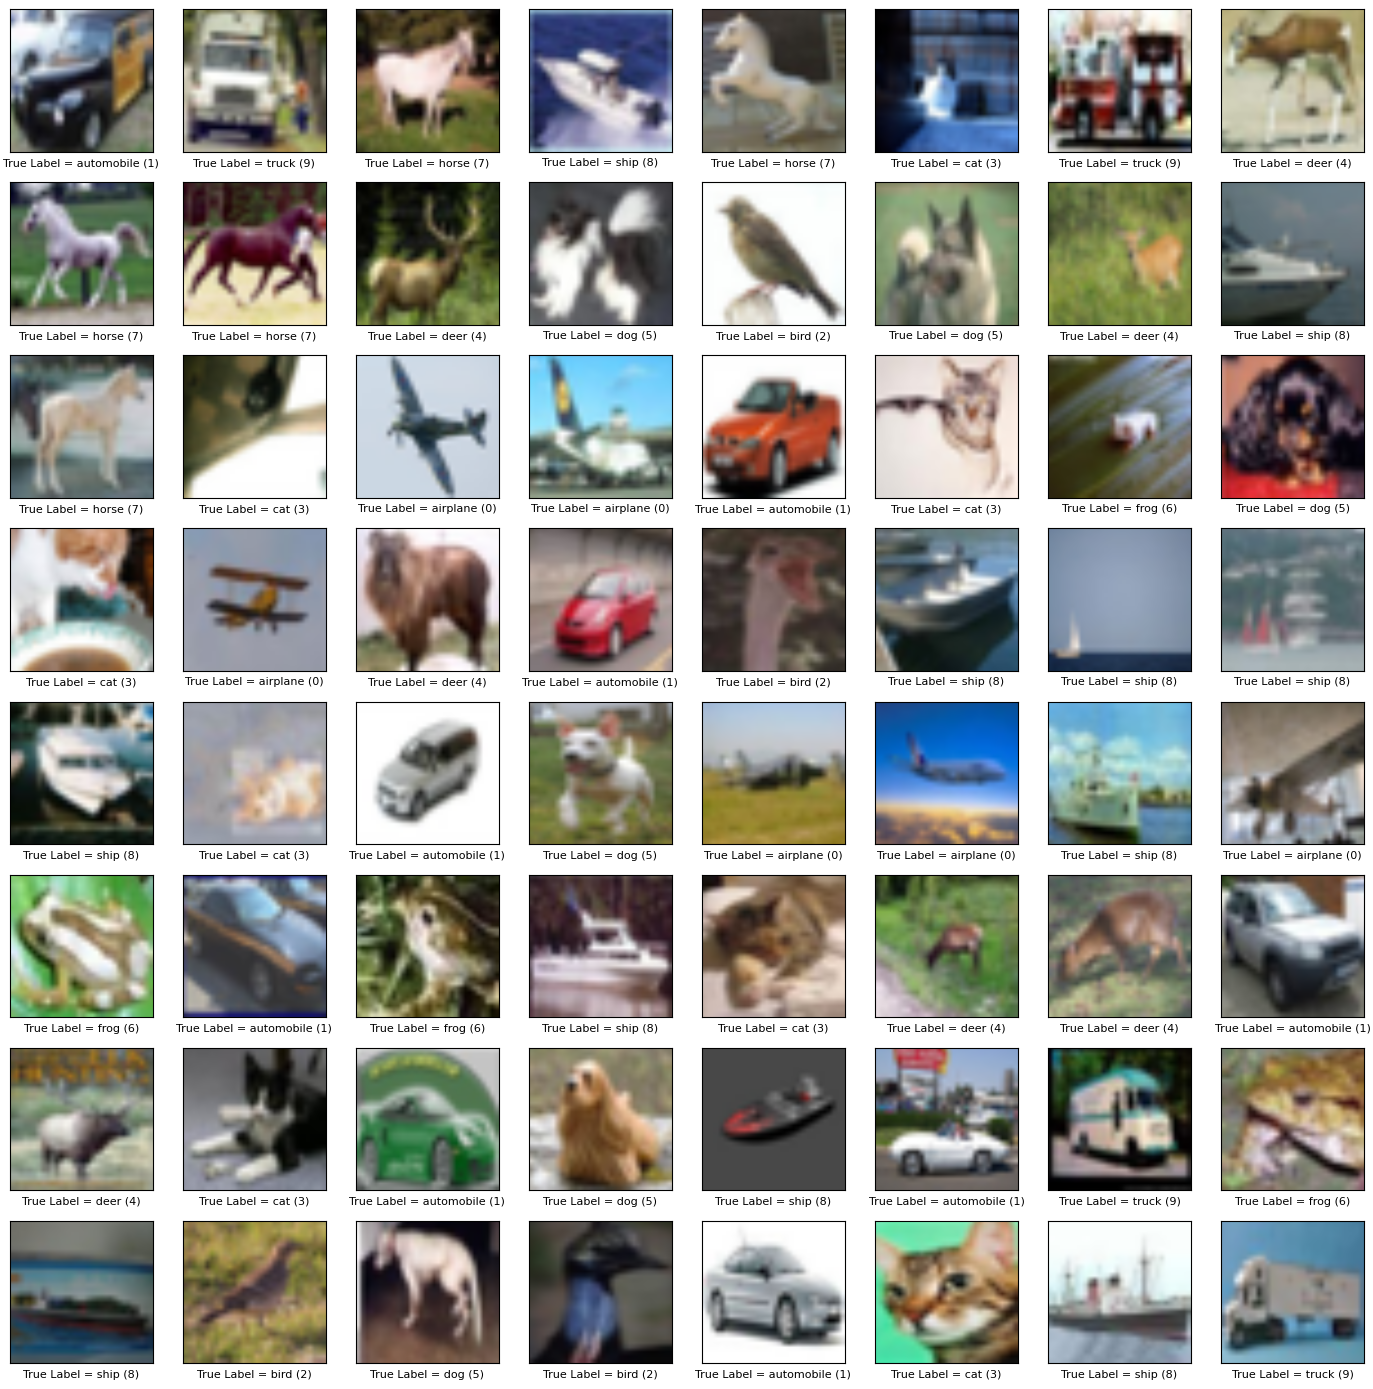

In [7]:
plt.figure(figsize=(14,14))
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(np.transpose(batch1_features_cifar10[i].numpy(), (1,2,0)))
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(f'True Label = {classes_cifar10[batch1_labels_cifar10[i]]} ({batch1_labels_cifar10[i]})', fontsize=8)
plt.tight_layout()
plt.show()

In [8]:
for i,(x,y) in enumerate(train_loader_cifar100):
  if i==0:
    batch1_features_cifar100 = x
    batch1_labels_cifar100 = y
    print(batch1_features_cifar100)
    print(batch1_labels_cifar100)
  elif i==1:
    batch2_features_cifar100 = x
    batch2_labels_cifar100 = y
  else:
    break

tensor([[[[0.2000, 0.2000, 0.2000,  ..., 0.4471, 0.4471, 0.4471],
          [0.2000, 0.2000, 0.2000,  ..., 0.4471, 0.4471, 0.4471],
          [0.2000, 0.2000, 0.2000,  ..., 0.4471, 0.4471, 0.4471],
          ...,
          [0.7608, 0.7608, 0.7608,  ..., 0.7725, 0.7725, 0.7725],
          [0.7608, 0.7608, 0.7608,  ..., 0.7725, 0.7725, 0.7725],
          [0.7608, 0.7608, 0.7608,  ..., 0.7725, 0.7725, 0.7725]],

         [[0.2275, 0.2275, 0.2275,  ..., 0.4863, 0.4863, 0.4863],
          [0.2275, 0.2275, 0.2275,  ..., 0.4863, 0.4863, 0.4863],
          [0.2275, 0.2275, 0.2275,  ..., 0.4863, 0.4863, 0.4863],
          ...,
          [0.7569, 0.7569, 0.7569,  ..., 0.7490, 0.7490, 0.7490],
          [0.7569, 0.7569, 0.7569,  ..., 0.7490, 0.7490, 0.7490],
          [0.7569, 0.7569, 0.7569,  ..., 0.7490, 0.7490, 0.7490]],

         [[0.1020, 0.1020, 0.1020,  ..., 0.3490, 0.3490, 0.3490],
          [0.1020, 0.1020, 0.1020,  ..., 0.3490, 0.3490, 0.3490],
          [0.1020, 0.1020, 0.1020,  ..., 0

In [9]:
batch1_features_cifar100.shape, batch1_labels_cifar100.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [10]:
classes_cifar100 = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

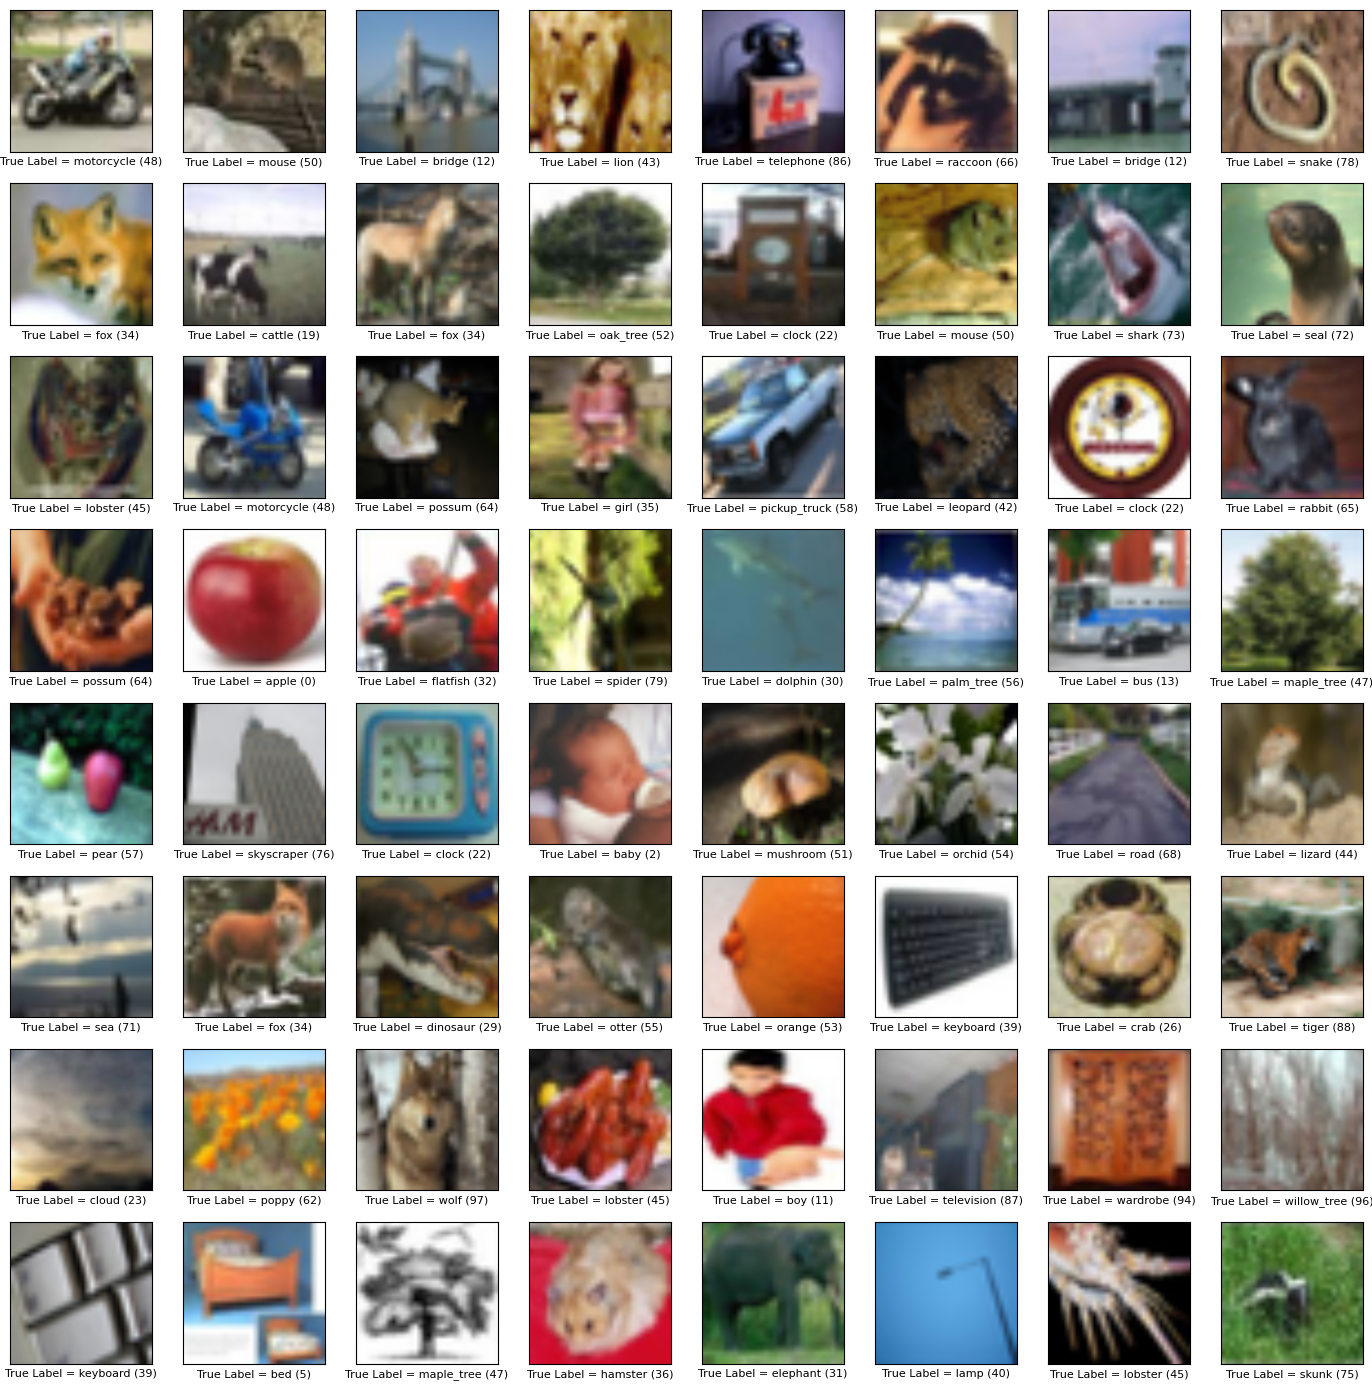

In [11]:
plt.figure(figsize=(14,14))
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.imshow(np.transpose(batch1_features_cifar100[i].numpy(), (1,2,0)))
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(f'True Label = {classes_cifar100[batch1_labels_cifar100[i]]} ({batch1_labels_cifar100[i]})', fontsize=8)
plt.tight_layout()
plt.show()

In [12]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((224,224)),
                                transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5))])

train_dataset_cifar10 = datasets.CIFAR10(root='/content/drive/MyDrive/MACHINE LEARNING MAY/DAY11_CNN_ARCHITECTURES/CIFAR10_DATA',
                                         train=True,
                                         download=True,
                                         transform=transform)

test_dataset_cifar10 = datasets.CIFAR10(root='/content/drive/MyDrive/MACHINE LEARNING MAY/DAY11_CNN_ARCHITECTURES/CIFAR10_DATA',
                                         train=False,
                                         download=True,
                                         transform=transform)

train_dataset_cifar100 = datasets.CIFAR100(root='/content/drive/MyDrive/MACHINE LEARNING MAY/DAY11_CNN_ARCHITECTURES/CIFAR100_DATA',
                                         train=True,
                                         download=True,
                                         transform=transform)

test_dataset_cifar100 = datasets.CIFAR100(root='/content/drive/MyDrive/MACHINE LEARNING MAY/DAY11_CNN_ARCHITECTURES/CIFAR100_DATA',
                                         train=False,
                                         download=True,
                                         transform=transform)

train_loader_cifar10 = DataLoader(train_dataset_cifar10, batch_size=64, shuffle=True, drop_last=True)
test_loader_cifar10 = DataLoader(test_dataset_cifar10, batch_size=64, shuffle=False, drop_last=True)
train_loader_cifar100 = DataLoader(train_dataset_cifar100, batch_size=64, shuffle=True, drop_last=True)
test_loader_cifar100 = DataLoader(test_dataset_cifar100, batch_size=64, shuffle=False, drop_last=True)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [13]:
torch.cuda.is_available()

False

In [14]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

In [15]:
def calculate_accuracy(model, loader):
  correct = 0
  total = 0

  model.eval()
  with torch.no_grad():
    for X, y in loader:
      X, y = X.to(device), y.to(device)
      outputs = model(X)
      target_pred_values, target_pred_indices = torch.max(outputs,dim=1)
      correct += torch.sum(y == target_pred_indices)
      total += len(y)
  accuracy = correct/total
  return accuracy

In [16]:
def train_model(model, train_loader, test_loader, epochs):

  model = model.to(device)

  train_losses = []
  train_accuracies = []
  test_losses = []
  test_accuracies = []
  model_weights = []

  optimizer = optim.Adam(params = model.parameters())
  loss_function = nn.CrossEntropyLoss()

  for epoch in range(epochs):

    print(f"Epoch {epoch+1}/{epochs}")
    ################### TRAINING PHASE ###################
    model.train()
    train_loss = 0.0
    for batch, (X_train, y_train) in tqdm(enumerate(train_loader), total=len(train_loader)):
      X_train, y_train = X_train.to(device), y_train.to(device)

      # Forward pass
      optimizer.zero_grad()
      outputs = model(X_train)

      # Backward pass
      loss = loss_function(outputs, y_train)
      loss.backward()

      # Gradient Descent
      optimizer.step()

      # Increment total train loss
      train_loss += loss.item() * X_train.shape[0]

    # End of loop for train_loader
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Train Accuracy
    train_accuracy = calculate_accuracy(model, train_loader)
    train_accuracies.append(train_accuracy)

    ################### VALIDATION PHASE ###################
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
      for batch, (X_test, y_test) in tqdm(enumerate(test_loader), total=len(test_loader)):
        X_test, y_test = X_test.to(device), y_test.to(device)

        # Forward pass
        outputs = model(X_test)

        # Test loss
        loss = loss_function(outputs, y_test)

        # Increment total test loss
        test_loss += loss.item() * X_test.shape[0]

    # End of loop for test_loader
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    # Test Accuracy
    test_accuracy = calculate_accuracy(model, test_loader)
    test_accuracies.append(test_accuracy)

    model_weights.append(model.state_dict().copy())

    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

  history_dict = {'model' : model,
                  'model_weights' : model_weights,
                  'train_accuracy' : train_accuracies,
                  'train_loss' : train_losses,
                  'test_accuracy' : test_accuracies,
                  'test_loss' : test_losses}

  return history_dict

In [ ]:
alexnet_cifar10 = models.alexnet().to(device)

In [ ]:
alexnet_cifar10.features[0]

Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))

In [ ]:
alexnet_cifar10.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)

In [ ]:
alexnet_cifar10.classifier[6] = nn.Linear(in_features=4096, out_features=10, bias=True).to(device)

In [ ]:
summary(alexnet_cifar10)

Layer (type:depth-idx)                   Param #
AlexNet                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       23,296
│    └─ReLU: 2-2                         --
│    └─MaxPool2d: 2-3                    --
│    └─Conv2d: 2-4                       307,392
│    └─ReLU: 2-5                         --
│    └─MaxPool2d: 2-6                    --
│    └─Conv2d: 2-7                       663,936
│    └─ReLU: 2-8                         --
│    └─Conv2d: 2-9                       884,992
│    └─ReLU: 2-10                        --
│    └─Conv2d: 2-11                      590,080
│    └─ReLU: 2-12                        --
│    └─MaxPool2d: 2-13                   --
├─AdaptiveAvgPool2d: 1-2                 --
├─Sequential: 1-3                        --
│    └─Dropout: 2-14                     --
│    └─Linear: 2-15                      37,752,832
│    └─ReLU: 2-16                        --
│    └─Dropout: 2-17                   

In [ ]:
history_alexnet_cifar10 = train_model(model=alexnet_cifar10,
            train_loader=train_loader_cifar10,
            test_loader=test_loader_cifar10,
            epochs=10)

Epoch 1/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 1.7260, Train Accuracy: 0.4624, Test Loss: 1.4765, Test Accuracy: 0.4537
Epoch 2/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 1.3931, Train Accuracy: 0.5694, Test Loss: 1.2235, Test Accuracy: 0.5601
Epoch 3/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 1.2476, Train Accuracy: 0.6196, Test Loss: 1.1264, Test Accuracy: 0.5997
Epoch 4/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 1.1542, Train Accuracy: 0.6602, Test Loss: 1.0438, Test Accuracy: 0.6325
Epoch 5/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 1.0710, Train Accuracy: 0.6880, Test Loss: 0.9916, Test Accuracy: 0.6491
Epoch 6/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 1.0152, Train Accuracy: 0.7091, Test Loss: 0.9570, Test Accuracy: 0.6674
Epoch 7/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 0.9529, Train Accuracy: 0.7229, Test Loss: 0.9378, Test Accuracy: 0.6719
Epoch 8/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 0.9212, Train Accuracy: 0.7489, Test Loss: 0.9111, Test Accuracy: 0.6832
Epoch 9/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 0.8875, Train Accuracy: 0.7567, Test Loss: 0.9047, Test Accuracy: 0.6875
Epoch 10/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 0.8537, Train Accuracy: 0.7604, Test Loss: 0.9049, Test Accuracy: 0.6939


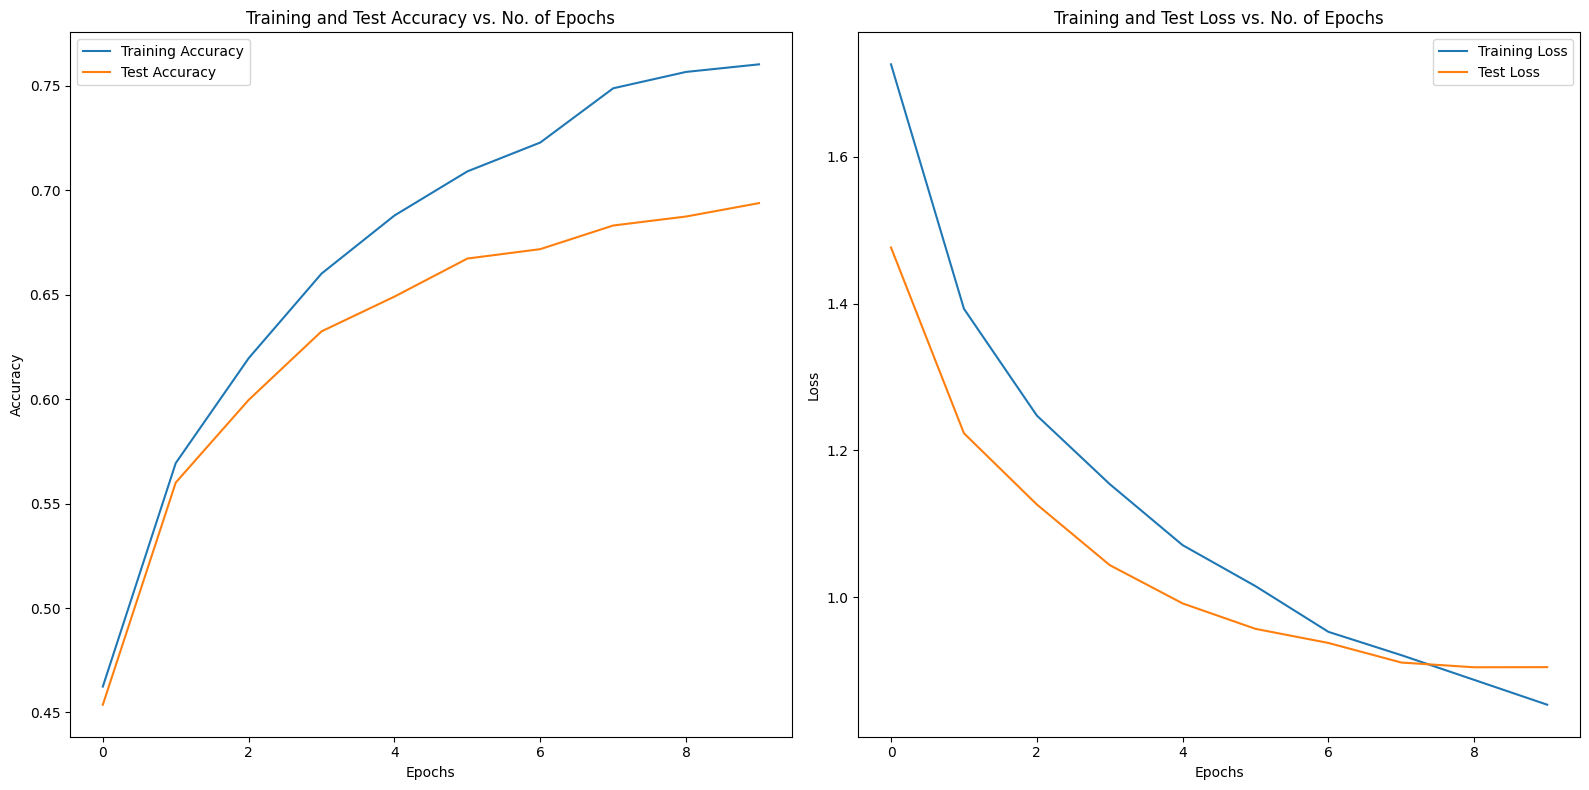

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title("Training and Test Accuracy vs. No. of Epochs")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot([x.item() for x in history_alexnet_cifar10['train_accuracy']], label='Training Accuracy')
plt.plot([x.item() for x in history_alexnet_cifar10['test_accuracy']], label='Test Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.title("Training and Test Loss vs. No. of Epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history_alexnet_cifar10['train_loss'], label='Training Loss')
plt.plot(history_alexnet_cifar10['test_loss'], label='Test Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
alexnet_cifar100 = models.alexnet().to(device)

In [ ]:
alexnet_cifar100.features[0]

Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))

In [ ]:
alexnet_cifar100.classifier[6] = nn.Linear(in_features=4096, out_features=100, bias=True).to(device)

In [ ]:
summary(alexnet_cifar100)

Layer (type:depth-idx)                   Param #
AlexNet                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       23,296
│    └─ReLU: 2-2                         --
│    └─MaxPool2d: 2-3                    --
│    └─Conv2d: 2-4                       307,392
│    └─ReLU: 2-5                         --
│    └─MaxPool2d: 2-6                    --
│    └─Conv2d: 2-7                       663,936
│    └─ReLU: 2-8                         --
│    └─Conv2d: 2-9                       884,992
│    └─ReLU: 2-10                        --
│    └─Conv2d: 2-11                      590,080
│    └─ReLU: 2-12                        --
│    └─MaxPool2d: 2-13                   --
├─AdaptiveAvgPool2d: 1-2                 --
├─Sequential: 1-3                        --
│    └─Dropout: 2-14                     --
│    └─Linear: 2-15                      37,752,832
│    └─ReLU: 2-16                        --
│    └─Dropout: 2-17                   

In [ ]:
history_alexnet_cifar100 = train_model(model=alexnet_cifar100,
            train_loader=train_loader_cifar100,
            test_loader=test_loader_cifar100,
            epochs=10)

Epoch 1/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 4.1950, Train Accuracy: 0.1155, Test Loss: 3.7200, Test Accuracy: 0.1163
Epoch 2/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 3.6411, Train Accuracy: 0.1893, Test Loss: 3.4072, Test Accuracy: 0.1781
Epoch 3/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 3.4102, Train Accuracy: 0.2334, Test Loss: 3.2286, Test Accuracy: 0.2173
Epoch 4/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 3.2265, Train Accuracy: 0.2758, Test Loss: 3.0959, Test Accuracy: 0.2431
Epoch 5/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 3.0779, Train Accuracy: 0.3049, Test Loss: 3.0385, Test Accuracy: 0.2568
Epoch 6/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 2.9571, Train Accuracy: 0.3473, Test Loss: 2.9093, Test Accuracy: 0.2846
Epoch 7/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 2.8481, Train Accuracy: 0.3908, Test Loss: 2.8337, Test Accuracy: 0.3042
Epoch 8/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 2.7381, Train Accuracy: 0.3973, Test Loss: 2.8646, Test Accuracy: 0.2979
Epoch 9/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 2.6331, Train Accuracy: 0.4519, Test Loss: 2.7638, Test Accuracy: 0.3156
Epoch 10/10


  0%|          | 0/781 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

Train Loss: 2.5576, Train Accuracy: 0.4740, Test Loss: 2.7664, Test Accuracy: 0.3179


In [19]:
!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/DAY11_CNN_ARCHITECTURES.ipynb" --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/DAY11_CNN_ARCHITECTURES.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 560, in convert_single_notebook
    output, resources = self.export_single_notebook(
  File "/usr/local/lib/python3.10/dis